<h2 style='text-align: right;'> Vinayasree Kalburgi </h2>

# <b><u> Project Title : CUSTOMER CLASSIFICATION </u></b>

## Project Description

### Company Introduction
Your client for this project is a retail banking institution.

- They are going to float a stock trading facility for their existing customers.
- The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
- They will have to incentivize their customers to adopt their offerings.
- One way to incentivize is to offer discounts on the commission for trading transactions.

### Current Scenario
The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

## Problem Statement

The current process suffers from the following problems:

- One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
- The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.

Your Role
- You are given datasets of past customers and their status (Revenue Grid 1 or 2).
- Your task is to build a classification model using the datasets.
- You need to build the best possible model.

Project Deliverables
- Deliverable: Predict whether a customer belongs to a high net worth or low net worth group.
- Machine Learning Task: Classification
- Target Variable: Status (high net worth (1) / low net worth (2))
- Win Condition: N/A (best possible model)

Evaluation Metric
- The model evaluation will be based on the F1 Score score.

## Data Description

We are provided with a dataset containing all the necessary information about the customers like their occupation, family income, gender, region, balance transfer, children, etc.

Also included in the dataset is the column Revenue_Grid which classifies the customers into high net worth customers (1) and low net worth customers (2).

This is the data that we have to predict for future customers.

The dataset is divided into two parts: Train, and Test sets.

##### Train Set:
The train set contains 8124 rows and 32 columns.
The last column Revenue_Grid is the target variable.

##### Test Set:
The test set contains 2031 rows and 31 columns.
The test set doesn’t contain the Revenue_Grid column.
It needs to be predicted for the test set.

### Installing & Importing Libraries

In [1]:
import numpy as np
import pandas as pd

##### Data Information

In [3]:
customer_class = pd.read_csv('existing_base_train.csv')
customer_class.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [4]:
customer_class['Revenue_Grid'].value_counts()

2    7264
1     860
Name: Revenue_Grid, dtype: int64

In [5]:
customer_class.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average_Credit_Card_Transaction    float64
Balance_Transfer                   float64
Term_Deposit                       float64
Life_Insurance                     float64
Medical_Insurance                  float64
Average_A/C_Balance                float64
Personal_Loan                      float64
Investment_in_Mutual_Fund          float64
Investment_Tax_Saving_Bond         float64
Home_Loan  

In [7]:
customer_class.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [8]:
# lets plot a kde on year_last_moved, average_credit_card_transaction
#looks like life_insurance has outlier (use box plot)
# detect outliers

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

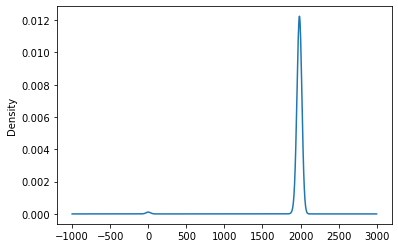

In [10]:
customer_class['year_last_moved'].plot.kde()

<AxesSubplot:ylabel='Density'>

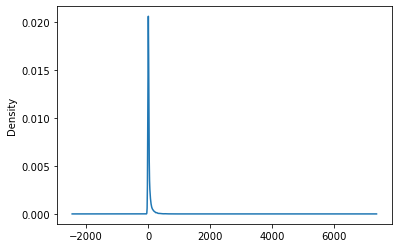

In [74]:
customer_class['Personal_Loan'].plot.kde()

<AxesSubplot:>

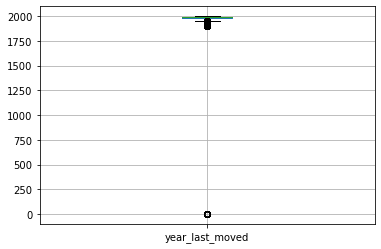

In [11]:
customer_class.boxplot(column=['year_last_moved'])

In [77]:
customer_class['region'].value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [12]:
cont_col_names=customer_class._get_numeric_data().columns.values.tolist()
cont_col_names

['REF_NO',
 'year_last_moved',
 'Average_Credit_Card_Transaction',
 'Balance_Transfer',
 'Term_Deposit',
 'Life_Insurance',
 'Medical_Insurance',
 'Average_A/C_Balance',
 'Personal_Loan',
 'Investment_in_Mutual_Fund',
 'Investment_Tax_Saving_Bond',
 'Home_Loan',
 'Online_Purchase_Amount',
 'Investment_in_Commudity',
 'Investment_in_Equity',
 'Investment_in_Derivative',
 'Portfolio_Balance',
 'Revenue_Grid']

<AxesSubplot:>

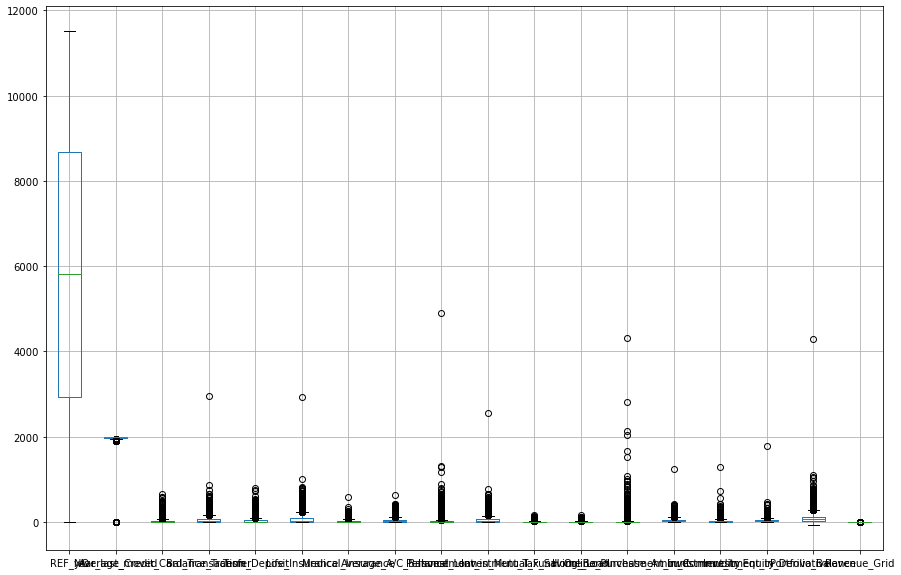

In [13]:
plt.figure(figsize=(15,10))
customer_class.boxplot(column=cont_col_names)

In [14]:
# lets ignore ref_no
cont_col_names.remove('REF_NO')
cont_col_names

['year_last_moved',
 'Average_Credit_Card_Transaction',
 'Balance_Transfer',
 'Term_Deposit',
 'Life_Insurance',
 'Medical_Insurance',
 'Average_A/C_Balance',
 'Personal_Loan',
 'Investment_in_Mutual_Fund',
 'Investment_Tax_Saving_Bond',
 'Home_Loan',
 'Online_Purchase_Amount',
 'Investment_in_Commudity',
 'Investment_in_Equity',
 'Investment_in_Derivative',
 'Portfolio_Balance',
 'Revenue_Grid']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'year_last_moved'),
  Text(2, 0, 'Average_Credit_Card_Transaction'),
  Text(3, 0, 'Balance_Transfer'),
  Text(4, 0, 'Term_Deposit'),
  Text(5, 0, 'Life_Insurance'),
  Text(6, 0, 'Medical_Insurance'),
  Text(7, 0, 'Average_A/C_Balance'),
  Text(8, 0, 'Personal_Loan'),
  Text(9, 0, 'Investment_in_Mutual_Fund'),
  Text(10, 0, 'Investment_Tax_Saving_Bond'),
  Text(11, 0, 'Home_Loan'),
  Text(12, 0, 'Online_Purchase_Amount'),
  Text(13, 0, 'Investment_in_Commudity'),
  Text(14, 0, 'Investment_in_Equity'),
  Text(15, 0, 'Investment_in_Derivative'),
  Text(16, 0, 'Portfolio_Balance'),
  Text(17, 0, 'Revenue_Grid')])

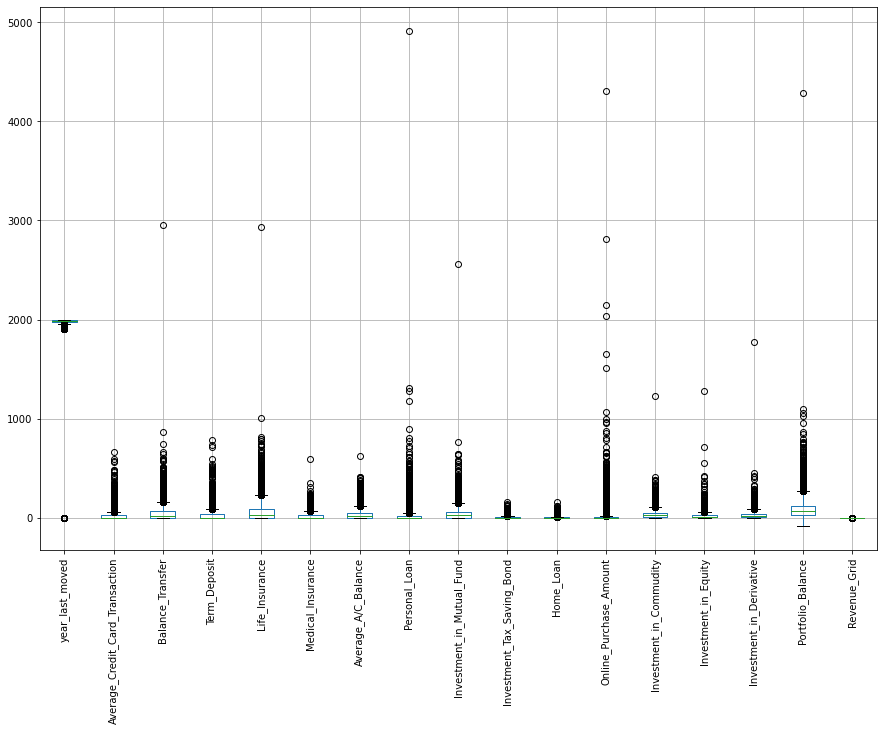

In [15]:
plt.figure(figsize=(15,10))
customer_class.boxplot(column=cont_col_names)
plt.xticks(rotation=90)

Above image classfies that following columns has outliers.
columns = 'year_last_moved', 'Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount', 'Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance'

<AxesSubplot:>

<Figure size 1080x720 with 0 Axes>

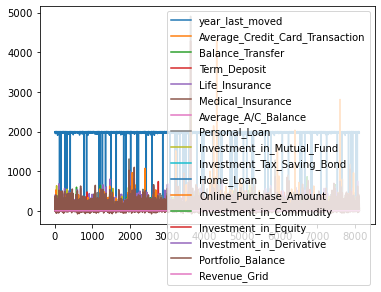

In [16]:
plt.figure(figsize=(15,10))
customer_class[cont_col_names].plot.line()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

<Figure size 1080x720 with 0 Axes>

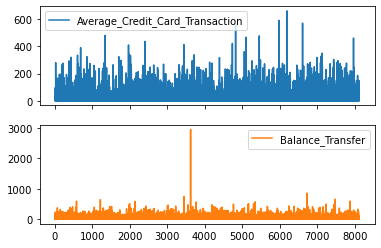

In [17]:
plt.figure(figsize=(15,10))
customer_class[['Average_Credit_Card_Transaction','Balance_Transfer']].plot.line(subplots=True)

In [18]:
import seaborn as sns

<AxesSubplot:>

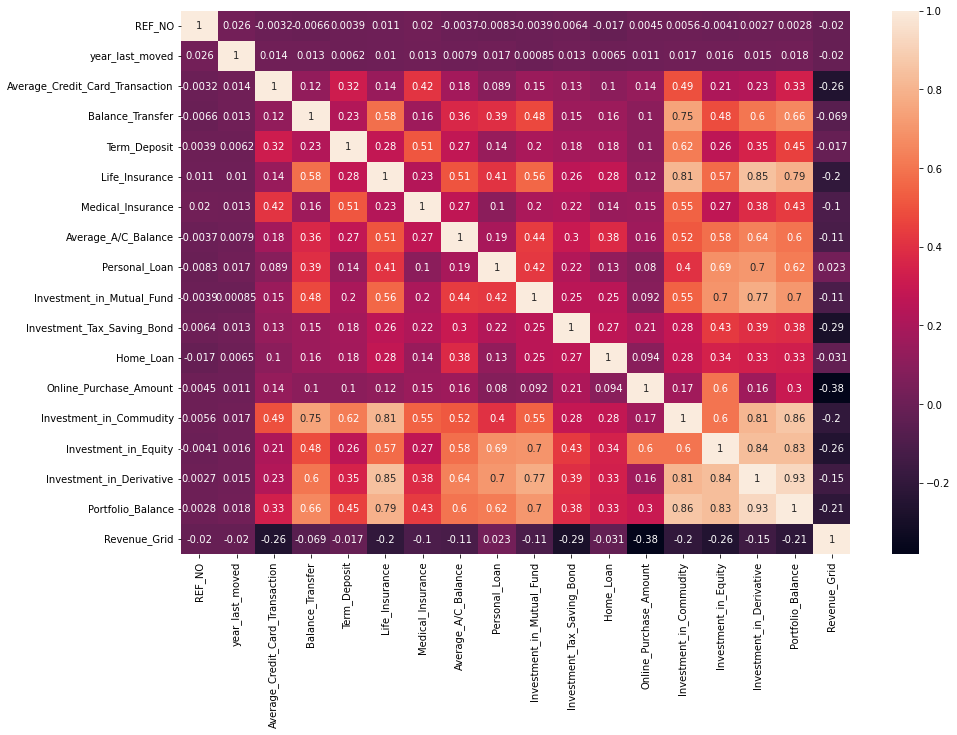

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(customer_class.corr(), annot = True)

<AxesSubplot:ylabel='Frequency'>

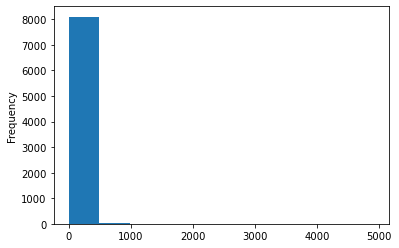

In [20]:
customer_class['Personal_Loan'].plot.hist()

In [68]:
customer_class['Personal_Loan'].max()

4905.93

In [21]:
customer_class['post_code'].value_counts()

NP18 3TJ    2
S70 5JE     2
S65 3DL     2
CM6 2JA     2
G64 3PL     2
           ..
LE9 7DA     1
M33 5RN     1
NW10 3NU    1
SN4 9AF     1
TS16 0HG    1
Name: post_code, Length: 8050, dtype: int64

In [22]:
customer_class['post_code'].nunique()

8050

In [23]:
customer_class['post_area'].value_counts()

PR5     28
TQ12    22
WA4     22
PR4     21
PR8     21
        ..
TN9      1
PA19     1
TR16     1
OL5      1
SS4      1
Name: post_area, Length: 1937, dtype: int64

In [24]:
customer_class['post_area'].nunique()

1937

In [25]:
customer_class['region'].value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [26]:
#occupation
customer_class['occupation'].value_counts()

Professional         1949
Retired              1799
Secretarial/Admin    1435
Housewife             984
Business Manager      578
Manual Worker         451
Unknown               449
Other                 432
Student                47
Name: occupation, dtype: int64

In [27]:
customer_class['age_band'].value_counts()

45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64

In [28]:
customer_class.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [29]:
customer_class.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [30]:
customer_class['total_investments']=customer_class['Investment_in_Mutual_Fund']+customer_class['Investment_Tax_Saving_Bond']+customer_class['Investment_in_Commudity']+customer_class['Investment_in_Equity']+customer_class['Investment_in_Derivative']+customer_class['Life_Insurance']+customer_class['Medical_Insurance']+customer_class['Portfolio_Balance']

In [31]:
customer_class.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid',
       'total_investments'],
      dtype='object')

In [32]:
customer_class.drop(['Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative','Life_Insurance','Medical_Insurance','Portfolio_Balance','REF_NO'],axis =1, inplace=True)

In [33]:
customer_class.columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Average_A/C_Balance', 'Personal_Loan', 'Home_Loan',
       'Online_Purchase_Amount', 'gender', 'region', 'Revenue_Grid',
       'total_investments'],
      dtype='object')

<AxesSubplot:>

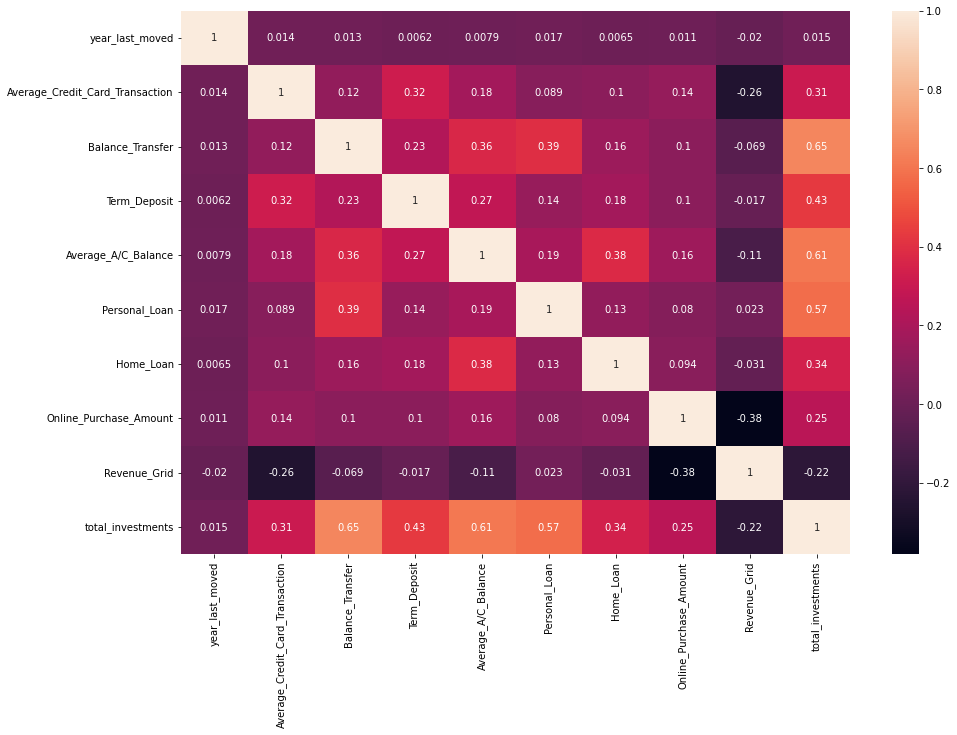

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(customer_class.corr(),annot=True)

In [35]:
customer_class[['post_area','post_code']].groupby('post_area').describe()

post_code                      
              count unique       top freq
post_area                                
AB12              4      4  AB12 3PQ    1
AB13              1      1  AB13 0EE    1
AB14              4      4  AB14 0XB    1
AB15              1      1  AB15 8DY    1
AB21              2      2  AB21 7NQ    1
...             ...    ...       ...  ...
YO61              6      6  YO61 1SN    1
YO62              1      1  YO62 6QA    1
YO7               6      6   YO7 1RR    1
YO8               9      8   YO8 9JZ    2
ZE2               4      4   ZE2 9DS    1

[1937 rows x 4 columns]

In [36]:
customer_class.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,...,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Personal_Loan,Home_Loan,Online_Purchase_Amount,gender,region,Revenue_Grid,total_investments
0,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,...,29.99,312.25,108.85,175.43,55.44,7.68,Female,North West,2,1261.57
1,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,...,74.48,0.00,48.45,15.99,0.00,18.99,Female,North West,2,287.59
2,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,...,24.46,0.00,0.00,0.02,0.00,0.00,Female,South West,2,58.55
3,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,...,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,2,118.97
4,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,...,0.00,0.00,0.00,0.00,0.00,0.00,Female,Unknown,2,15.18


In [37]:
customer_class.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   object 
 1   age_band                         8124 non-null   object 
 2   status                           8124 non-null   object 
 3   occupation                       8124 non-null   object 
 4   occupation_partner               8124 non-null   object 
 5   home_status                      8124 non-null   object 
 6   family_income                    8124 non-null   object 
 7   self_employed                    8124 non-null   object 
 8   self_employed_partner            8124 non-null   object 
 9   year_last_moved                  8124 non-null   int64  
 10  TVarea                           8124 non-null   object 
 11  post_code                        8124 non-null   object 
 12  post_area           

In [38]:
customer_cont = customer_class[['year_last_moved','Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Average_A/C_Balance','Personal_Loan','Home_Loan','Online_Purchase_Amount','Revenue_Grid','total_investments']]
customer_cat = customer_class.drop(['year_last_moved','Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Average_A/C_Balance','Personal_Loan','Home_Loan','Online_Purchase_Amount','Revenue_Grid','total_investments'], axis = 1)

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer_cat = customer_cat.apply(le.fit_transform)

In [40]:
customer_final = pd.concat([customer_cat,customer_cont], axis = 1)
customer_final.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,...,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Personal_Loan,Home_Loan,Online_Purchase_Amount,Revenue_Grid,total_investments
0,1,3,1,4,4,1,11,0,0,7,...,1981,26.98,29.99,312.25,108.85,175.43,55.44,7.68,2,1261.57
1,4,6,1,6,4,1,11,0,0,7,...,1997,35.98,74.48,0.00,48.45,15.99,0.00,18.99,2,287.59
2,0,4,1,2,2,2,7,1,1,6,...,1996,0.00,24.46,0.00,0.00,0.02,0.00,0.00,2,58.55
3,1,3,1,2,2,1,8,0,0,8,...,1990,44.99,0.00,0.00,0.00,0.00,0.00,0.00,2,118.97
4,4,8,1,1,4,1,11,0,0,13,...,1989,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,15.18


In [41]:
customer_final.shape

(8124, 24)

In [42]:
customer_final.isnull().sum()

children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
TVarea                             0
post_code                          0
post_area                          0
gender                             0
region                             0
year_last_moved                    0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Average_A/C_Balance                0
Personal_Loan                      0
Home_Loan                          0
Online_Purchase_Amount             0
Revenue_Grid                       0
total_investments                  0
dtype: int64

In [43]:
X = customer_final.drop('Revenue_Grid',axis=1)
y = customer_final['Revenue_Grid']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
X_train.shape, y_train.shape

((6499, 23), (6499,))

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
logreg.coef_

array([[ 0.00617571,  0.01254868,  0.0040101 ,  0.00986764,  0.00798272,
         0.00263976,  0.00323799, -0.00025006, -0.00071784,  0.00631533,
        -0.00317938,  0.01363944, -0.00033075,  0.00724928,  0.00138849,
        -0.01360678,  0.00465317,  0.02112483,  0.01207144,  0.02731261,
         0.04185059, -0.04123107, -0.00419393]])

In [49]:
y_train_pred =logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred), accuracy_score(y_test,y_test_pred)

(0.9375288505923989, 0.9292307692307692)

In [51]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred), f1_score(y_test,y_test_pred)

(0.6254612546125461, 0.6229508196721312)

In [52]:
customer_class_test = pd.read_csv('existing_base_test.csv')

In [53]:
customer_class_test.shape

(2031, 31)

In [54]:
customer_class_test.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,...,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,...,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,...,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,...,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,...,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99


In [55]:
customer_class_test['total_investments']=customer_class_test['Investment_in_Mutual_Fund']+customer_class_test['Investment_Tax_Saving_Bond']+customer_class_test['Investment_in_Commudity']+customer_class_test['Investment_in_Equity']+customer_class_test['Investment_in_Derivative']+customer_class_test['Life_Insurance']+customer_class_test['Medical_Insurance']+customer_class_test['Portfolio_Balance']

In [56]:
customer_class_test.drop(['Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative','Life_Insurance','Medical_Insurance','Portfolio_Balance','REF_NO'],axis =1, inplace=True)

In [57]:
customer_class_test.shape

(2031, 23)

In [58]:
customer_class_test.columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Average_A/C_Balance', 'Personal_Loan', 'Home_Loan',
       'Online_Purchase_Amount', 'gender', 'region', 'total_investments'],
      dtype='object')

In [59]:
customer_test_cont = customer_class_test[['year_last_moved','Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Average_A/C_Balance','Personal_Loan','Home_Loan','Online_Purchase_Amount','total_investments']]
customer_test_cat = customer_class_test.drop(['year_last_moved','Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Average_A/C_Balance','Personal_Loan','Home_Loan','Online_Purchase_Amount','total_investments'], axis = 1)

In [60]:
customer_test_cat = customer_test_cat.apply(le.fit_transform)

In [61]:
customer_test_final = pd.concat([customer_test_cat,customer_test_cont], axis = 1)
customer_test_final.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,...,region,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Average_A/C_Balance,Personal_Loan,Home_Loan,Online_Purchase_Amount,total_investments
0,4,11,1,5,1,1,3,0,0,7,...,8,1973,41.98,55.47,24.99,44.47,0.00,0.00,0.00,292.93
1,4,3,1,8,0,1,11,0,0,0,...,7,1996,0.00,0.00,0.00,29.49,170.31,13.47,57.46,713.77
2,4,11,1,1,5,1,4,0,0,6,...,8,1958,0.00,154.47,0.00,87.83,0.00,0.00,0.00,394.60
3,0,1,1,3,3,1,5,0,0,4,...,6,1993,18.98,60.98,0.00,0.00,102.43,0.00,0.00,234.65
4,4,10,4,5,8,1,0,0,0,7,...,7,1976,0.00,144.90,0.00,32.98,0.00,17.93,5.45,370.09


In [62]:
customer_test_final.isnull().sum()

children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
TVarea                             0
post_code                          0
post_area                          0
gender                             0
region                             0
year_last_moved                    0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Average_A/C_Balance                0
Personal_Loan                      0
Home_Loan                          0
Online_Purchase_Amount             0
total_investments                  0
dtype: int64

In [63]:
y_pred = logreg.predict(customer_test_final)

In [64]:
print(y_pred.shape)

(2031,)


In [65]:
customer_test_df = pd.read_csv('existing_base_test.csv')

In [66]:
df1 = pd.DataFrame({'x':customer_test_df['REF_NO'], 'y': y_pred})

In [67]:
df1.to_csv('output_customer_classification.csv',index=False, header=False)